In [82]:
import re

# Data Science
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns
%matplotlib inline

# Lectura de datos

In [83]:
data = pd.read_csv("../Datos/historicos-pib.csv", header=None).T # series en vertical
data.iloc[0,:2] = ["Año", "Trimestre"] # Renombrando columnas
columns = data.iloc[0] # Obteniendo nombre de las columnas
data = data.iloc[1:,:] # Quedándonos con la serie solamente

# expresión regular para quedarnos nada mas con el nombre de los sectores
pattern = re.compile(r"[\w .-]* - ")
new_columns = columns.apply(lambda col: pattern.sub("", col))
data.columns = new_columns

data.Año.fillna(method="pad", inplace = True) # rellenando columna de años
data.Año = data.Año.apply(lambda año:int(str(año)[:4])) # quitando etiquetas de R y P
data.Trimestre = data.Trimestre.apply(lambda t:t[:2] if t[0] == "T" else t) # quitando etiquetas
data.set_index(["Año", "Trimestre"], inplace=True) # multindex de año y trimestre

# Pasando todo a numérico
for column in data.columns:
    data[column] = data[column].apply(lambda n:float(n.replace(" ", "")) if isinstance(n,str) else n)

data

0               Impuestos sobre los productos, netos  Agricultura  \
Año  Trimestre                                                      
1993 T1                                     388594.0     216828.0   
     T2                                     388084.0     209611.0   
     T3                                     379390.0     179794.0   
     T4                                     422664.0     245272.0   
     6 Meses                                388339.0     213220.0   
...                                              ...          ...   
2020 T3                                     713290.0     305998.0   
     T4                                          NaN          NaN   
     6 Meses                                701259.0     371996.0   
     9 Meses                                705270.0     349996.0   
     Anual                                       NaN          NaN   

0               Cría y explotación de animales  Aprovechamiento forestal  \
Año  Trimestre                                                             
1993 T1                               111883.0                   17803.0   
     T2                               126136.0                   17044.0   
     T3                               146416.0                   16858.0   
     T4                               133375.0                   16537.0   
     6 Meses                          119010.0                   17424.0   
...                                        ...                       ...   
2020 T3                               193131.0                   17010.0   
     T4                                    NaN                       NaN   
     6 Meses                          177412.0                   17036.0   
     9 Meses                          182652.0                   17028.0   
     Anual                                 NaN                       NaN   

0               Pesca, caza y captura  \
Año  Trimestre                          
1993 T1                        9059.0   
     T2                       10803.0   
     T3                        8911.0   
     T4                       10099.0   
     6 Meses                   9931.0   
...                               ...   
2020 T3                       14996.0   
     T4                           NaN   
     6 Meses                  13754.0   
     9 Meses                  14168.0   
     Anual                        NaN   

0               Servicios relacionados con las actividades agropecuarias y forestales  \
Año  Trimestre                                                                          
1993 T1                                                     649.0                       
     T2                                                     498.0                       
     T3                                                     582.0                       
     T4                                                     730.0                       
     6 Meses                                                573.0                       
...                                                           ...                       
2020 T3                                                    1056.0                       
     T4                                                       NaN                       
     6 Meses                                               1433.0                       
     9 Meses                                               1307.0                       
     Anual                                                    NaN                       

0               Extracción de petróleo y gas  \
Año  Trimestre                                 
1993 T1                             865047.0   
     T2                             895218.0   
     T3                             901125.0   
     T4                             923834.0   
     6 Meses                        880133.0   
...                                      ...   
2020 T3                             5

# Selección trimestral

In [84]:
select = "T1 T2 T3 T4".split()
trimestrales = data.loc[pd.IndexSlice[:, select], :].sort_index()
trimestrales.dropna(inplace=True)
#trimestrales.to_csv("../Datos/trimestrales.csv")
trimestrales

0               Impuestos sobre los productos, netos  Agricultura  \
Año  Trimestre                                                      
1993 T1                                     388594.0     216828.0   
     T2                                     388084.0     209611.0   
     T3                                     379390.0     179794.0   
     T4                                     422664.0     245272.0   
1994 T1                                     409250.0     212307.0   
...                                              ...          ...   
2019 T3                                     822448.0     269969.0   
     T4                                     849938.0     454425.0   
2020 T1                                     774944.0     355884.0   
     T2                                     627575.0     388108.0   
     T3                                     713290.0     305998.0   

0               Cría y explotación de animales  Aprovechamiento forestal  \
Año  Trimestre                                                             
1993 T1                               111883.0                   17803.0   
     T2                               126136.0                   17044.0   
     T3                               146416.0                   16858.0   
     T4                               133375.0                   16537.0   
1994 T1                               110839.0                   16421.0   
...                                        ...                       ...   
2019 T3                               187821.0                   19273.0   
     T4                               196956.0                   20543.0   
2020 T1                               174004.0                   18816.0   
     T2                               180821.0                   15257.0   
     T3                               193131.0                   17010.0   

0               Pesca, caza y captura  \
Año  Trimestre                          
1993 T1                        9059.0   
     T2                       10803.0   
     T3                        8911.0   
     T4                       10099.0   
1994 T1                        9077.0   
...                               ...   
2019 T3                       15774.0   
     T4                       17219.0   
2020 T1                       12756.0   
     T2                       14752.0   
     T3                       14996.0   

0               Servicios relacionados con las actividades agropecuarias y forestales  \
Año  Trimestre                                                                          
1993 T1                                                     649.0                       
     T2                                                     498.0                       
     T3                                                     582.0                       
     T4                                                     730.0                       
1994 T1                                                     890.0                       
...                                                           ...                       
2019 T3                                                    1439.0                       
     T4                                                    4584.0                       
2020 T1                                                    1653.0                       
     T2                                                    1214.0                       
     T3                                                    1056.0                       

0               Extracción de petróleo y gas  \
Año  Trimestre                                 
1993 T1                             865047.0   
     T2                             895218.0   
     T3                             901125.0   
     T4                             923834.0   
1994 T1                             895605.0   
...                                      ...   
2019 T3                             6

In [85]:
trimestrales.describe().T

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
"Impuestos sobre los productos, netos",111.0,575762.873874,128583.905263,363922.0,478396.5,564549.0,645443.5,856581.0
Agricultura,111.0,284996.324324,68647.640492,160516.0,238052.0,271536.0,327071.5,468778.0
Cría y explotación de animales,111.0,152525.450450,21547.622932,108194.0,134879.0,153806.0,169911.0,196956.0
Aprovechamiento forestal,111.0,18524.153153,1642.547728,15257.0,17146.5,18469.0,19677.5,22714.0
"Pesca, caza y captura",111.0,11808.864865,2693.023531,7768.0,9943.0,11304.0,13076.5,20953.0
...,...,...,...,...,...,...,...,...
Servicios de preparación de alimentos y bebidas,111.0,205292.045045,25518.901494,104661.0,187639.0,204978.0,220771.5,278830.0
Servicios de reparación y mantenimiento,111.0,68345.576577,11611.789904,43750.0,59845.0,71882.0,77105.5,92781.0
Servicios personales,111.0,126533.891892,17296.489626,95921.0,111032.0,126818.0,140161.0,157347.0


# PIB en total (por trimestres)

In [86]:
totales = trimestrales.sum(axis=1)
totales.shape

(111,)

In [87]:
totales.head(8)

Año   Trimestre
1993  T1           10008894.0
      T2           10171035.0
      T3           10066263.0
      T4           10416101.0
1994  T1           10343396.0
      T2           10772524.0
      T3           10602753.0
      T4           10952771.0
dtype: float64

In [27]:
totales.describe()

count    1.110000e+02
mean     1.431392e+07
std      2.573846e+06
min      9.795716e+06
25%      1.248511e+07
50%      1.430652e+07
75%      1.627399e+07
max      1.899003e+07
dtype: float64

Text(0.5, 1.0, 'PIB')

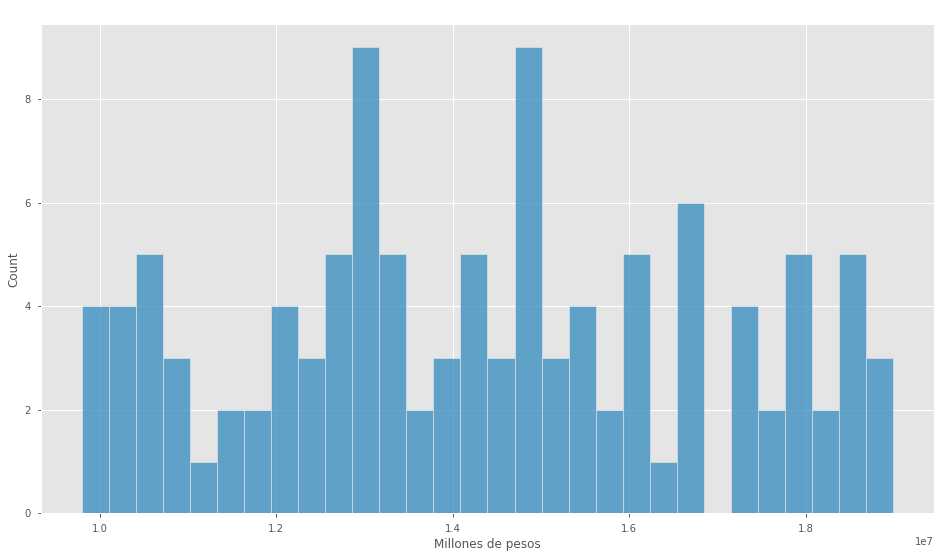

In [39]:
fig, ax = plt.subplots(figsize=(16,9))

sns.histplot(data=totales, ax=ax, bins=30)
ax.set_xlabel("Millones de pesos")
ax.set_title("PIB")

Text(0, 0.5, 'Millones de pesos')

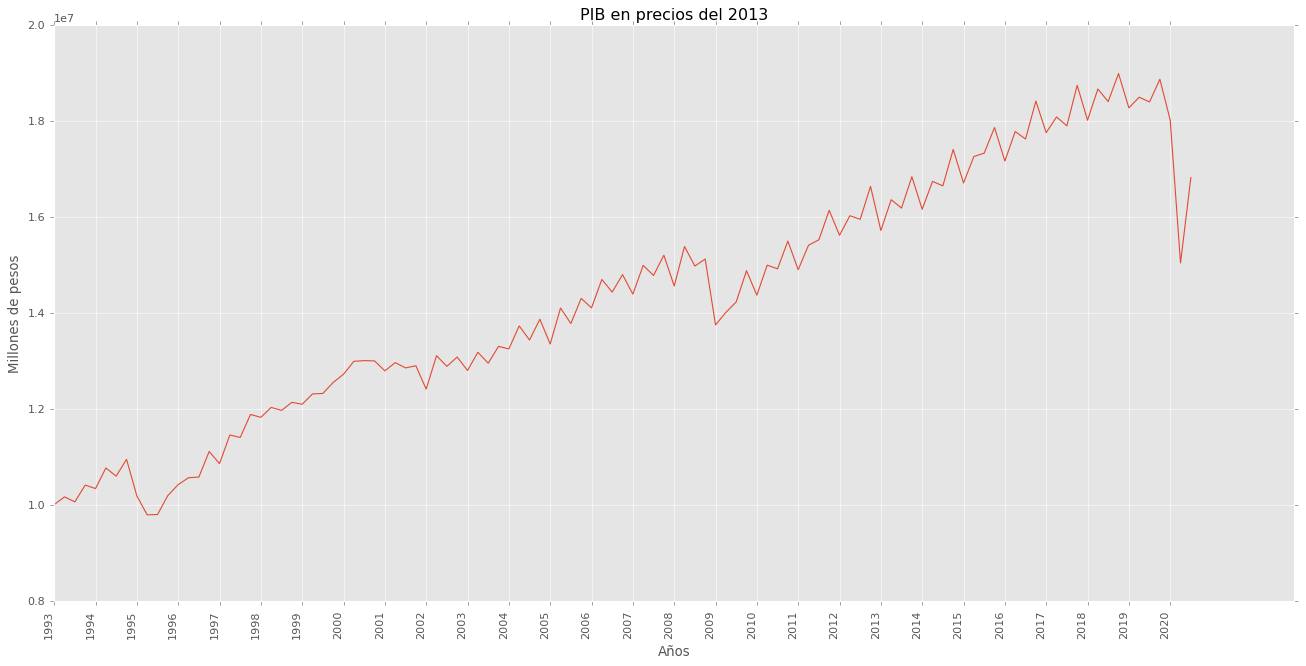

In [81]:
fig, ax = plt.subplots(figsize=(20,9))

dates = totales.index.to_flat_index().values.tolist()
años = [año for año, trimestre in dates if trimestre == "T1"]

ax.plot(totales.values)
ax.set_xticks(np.arange(0, totales.shape[0], 4)) # ticks cada año
ax.set_xticklabels(años, rotation=90, ha='right')
ax.set_title("PIB en precios del 2013")
ax.set_xlabel("Años")
ax.set_ylabel("Millones de pesos")

* Tendencia creciente aditiva
* Periodicidad semestral (?)

# Visualización

<AxesSubplot:xlabel='Agricultura', ylabel='Count'>

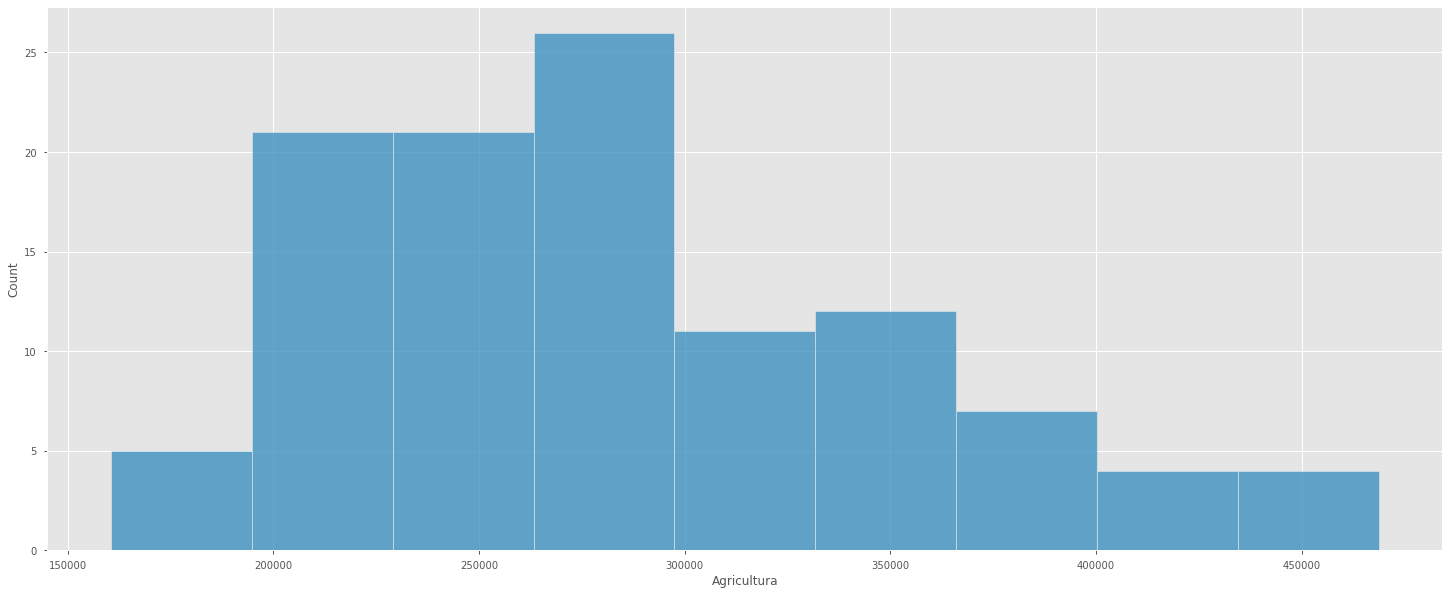

In [25]:
fig, ax = plt.subplots(figsize=(25,10))

sns.histplot(trimestrales, x="Agricultura", ax=ax)

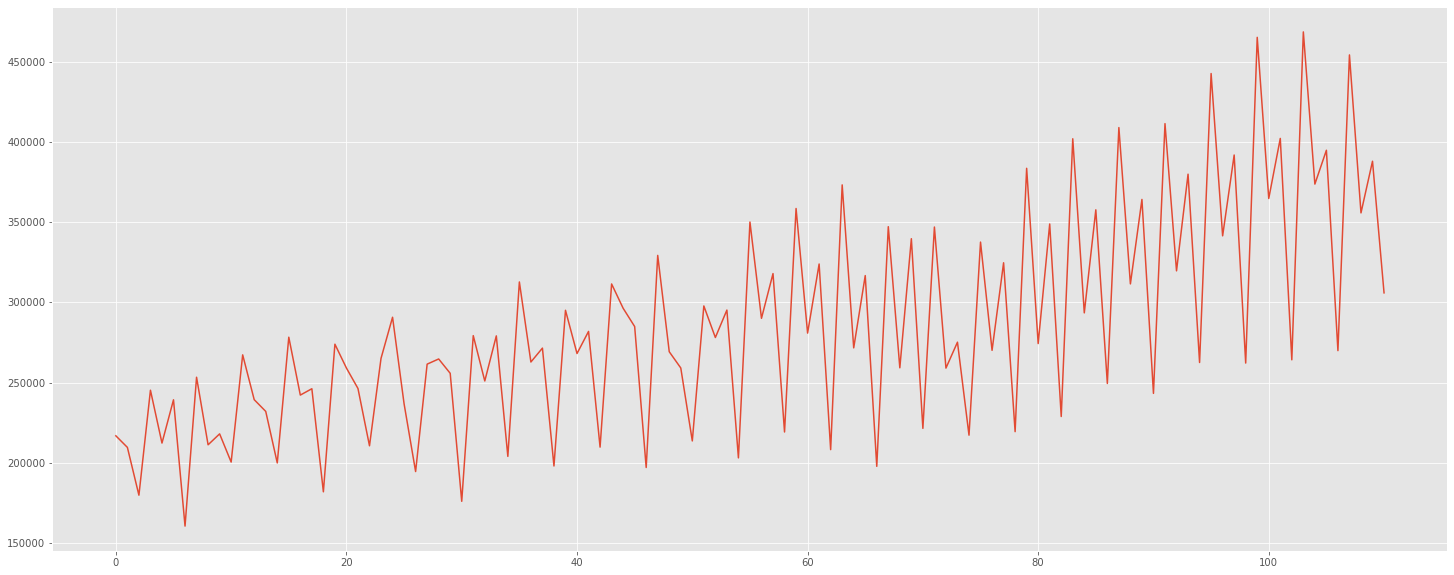

In [99]:
fig, ax = plt.subplots(figsize=(25,10))

ax.plot(np.arange(trimestrales["Agricultura"].size), trimestrales["Agricultura"])

In [100]:
def scatterplot(df, x, y, ax=None):
    if not ax:
        ax = plt.gca()
    
    ax.scatter(df[x], df[y])
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(f"{x} vs {y}")

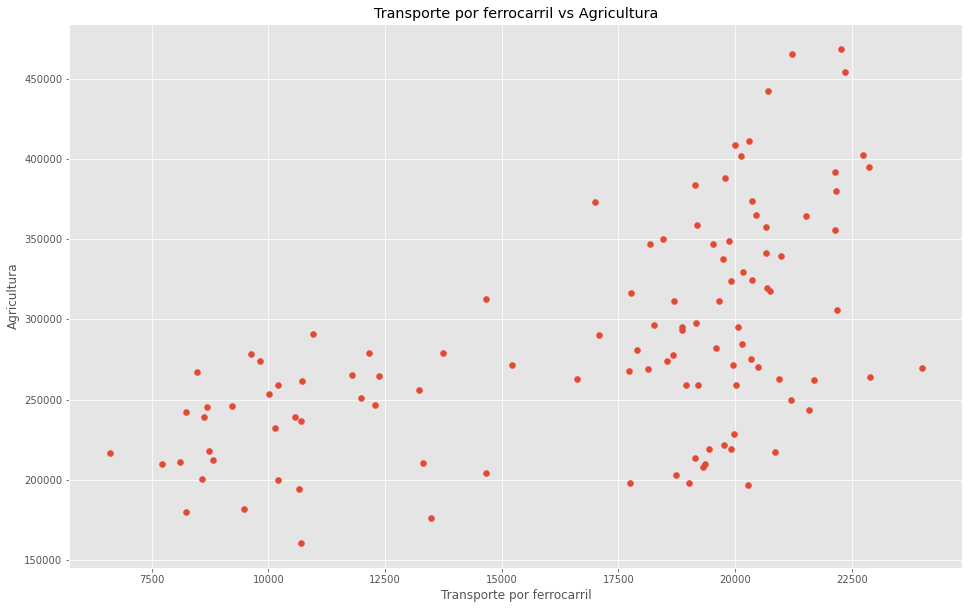

In [101]:
fig, ax = plt.subplots(figsize=(16,10))

scatterplot(trimestrales, "Transporte por ferrocarril", "Agricultura")

------------
# Variables

Pon lo que quieres encontrar en `busqueda`

In [142]:
busqueda = "alambre"
for columna in trimestrales.columns:
    if busqueda.lower() in columna.lower():
        print(columna)

Fabricación de alambre, productos de alambre y resortes


In [141]:
trimestrales.loc[:,"Fabricación de alambre, productos de alambre y resortes"].mean()

6544.972972972973

# Correlaciones

In [131]:
%matplotlib qt

corr = trimestrales.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(40, 35))

cmap = sns.diverging_palette(230, 0, l=37, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:xlabel='0', ylabel='0'>

# PCA

In [93]:
%matplotlib inline

from sklearn.decomposition import PCA

In [24]:
X = trimestrales.values
X.shape

(111, 135)

In [41]:
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)
X_r.shape

(111, 2)

In [97]:
pca.explained_variance_ratio_

array([0.89786267, 0.05096582])

In [54]:
def correlaciones_pca(original, componentes):
    n_rows, n_cols = original.shape
    _, n_comps = componentes.shape
    correlaciones = np.corrcoef(original, componentes, rowvar=False)
    return correlaciones[:-n_comps, n_cols:]

In [58]:
corrs = correlaciones_pca(X, X_r)

corrs.shape

Text(0, 0.5, 'Componente 2')

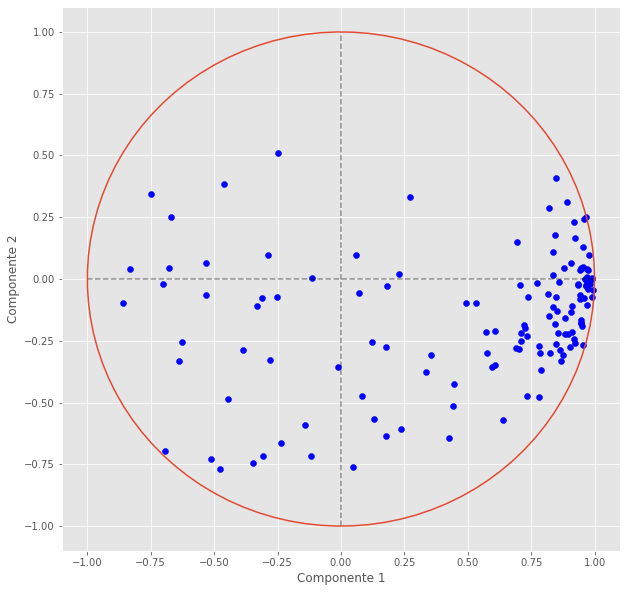

In [69]:
plt.figure(figsize=(10,10))

θ = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(θ), np.sin(θ))
plt.vlines(x=0, ymin=-1, ymax=1, color="black", ls="--", alpha=0.4)
plt.hlines(y=0, xmin=-1, xmax=1, color="black", ls="--", alpha=0.4)
plt.scatter(corrs[:,0], corrs[:,1], c="blue")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")